# Principal Components Analysis Using Data Microarray

In [ ]:
# !pip install prince
# !pip install pyspark

In [2]:
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas.plotting as pd_plot
import numpy as np
import matplotlib.pyplot as plt
import pyspark as pyspark
import prince

In [122]:
cd

C:\Users\Novendri Isra Asriny


In [25]:
#Set WD
os.chdir("##")
df = pd.read_csv("Nutt-2003-v2_BrainCancer.csv")

In [166]:
df.head()

,id,Brain_CG_1,Brain_CG_10,Brain_CG_11,Brain_CG_12,Brain_CG_13,Brain_CG_14,Brain_CG_2,Brain_CG_3,Brain_CG_4,...,Brain_NG_13,Brain_NG_14,Brain_NG_2,Brain_NG_3,Brain_NG_4,Brain_NG_5,Brain_NG_6,Brain_NG_7,Brain_NG_8,Brain_NG_9
0,1005_at,10.0,195.08,200.60,133.38,50.82,1121.80,684.12,749.21,70.09,...,35.67,44.49,10.00,134.11,131.43,80.12,40.48,166.92,148.67,189.07
1,1039_s_at,18.0,24.80,144.75,178.00,14.08,224.44,278.79,146.43,194.13,...,64.44,60.64,45.98,140.79,52.31,58.59,28.49,76.55,45.35,145.31
2,103_at,10.0,35.03,10.00,43.22,20.20,66.62,19.86,34.77,33.55,...,10.00,40.65,10.00,83.01,14.13,29.67,22.15,44.05,77.62,11.22
3,1052_s_at,167.9,148.51,354.78,158.48,75.30,410.88,669.72,455.08,322.62,...,19.10,81.96,24.18,303.56,264.75,392.30,79.87,201.64,332.68,232.13
4,1058_at,10.0,201.51,30.22,99.18,177.54,52.57,292.81,17.64,57.08,...,17.79,120.91,23.43,37.22,41.89,65.70,29.63,10.00,12.62,110.30


In [167]:
def plot_corr(dataframe,size=10):                         # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

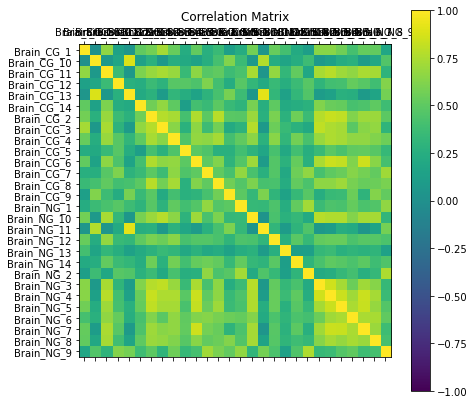

In [168]:
plot_corr(df,7)
plt.show()

#---------------------------------------------------------#

In [6]:
DATA_PATH = pd.DataFrame(df.drop(['id'],axis=1))
X = DATA_PATH


In [10]:
import pandas as pd
y = df['id']
y = pd.Series(y).map({0: '1005_at',1: '1039_s_at',2: '103_at',3: '1052_s_at',4: '1058_at',5: '1063_s_at',6: '1072_g_at',7: '1091_at',8: '1101_at',9: '1104_s_at',10: '1124_at',11: '1126_s_at',12: '1136_at',13: '113_i_at',14: '1153_f_at',15: '1198_at',16: '120_at',17: '1217_g_at',18: '1230_g_at',19: '1237_at',20: '1242_at',21: '1251_g_at',22: '1262_s_at',23: '1269_at',24: '1277_at',25: '1319_at',26: '1321_s_at',27: '1327_s_at',28: '1333_f_at',29: '1336_s_at',30: '1346_at',31: '1355_g_at',32: '1369_s_at',33: '1385_at',34: '1396_at',35: '1427_g_at',36: '1451_s_at',37: '1456_s_at',38: '1470_at',39: '1486_at',40: '1491_at',41: '1507_s_at',42: '1511_at',43: '1516_g_at',44: '1517_at',45: '1519_at',46: '1535_at',47: '1537_at',48: '1544_at',49: '1558_g_at',50: '1561_at',51: '1562_g_at',52: '1566_at',53: '1585_at',54: '1586_at',55: '1591_s_at',56: '160029_at',57: '160039_at',58: '1602_at',59: '1603_g_at',60: '1606_at',61: '1642_at',62: '1649_at',63: '1650_g_at',64: '1651_at',65: '1664_at',66: '1668_s_at',67: '166_at',68: '1678_g_at',69: '1693_s_at',70: '1704_at',71: '1708_at',72: '1709_g_at',73: '1731_at',74: '1737_s_at',75: '1741_s_at',76: '1747_at',77: '1751_g_at',78: '1752_at',79: '1771_s_at',80: '1779_s_at',81: '1786_at',82: '1803_at',83: '1814_at',84: '181_g_at',85: '1820_g_at',86: '1824_s_at',87: '183_at',88: '1842_at',89: '184_at',90: '1854_at',91: '1860_at',92: '1884_s_at',93: '1890_at',94: '1916_s_at',95: '1937_at',96: '1939_at',97: '1942_s_at',98: '1953_at',99: '1968_g_at',100: '1970_s_at',101: '1972_s_at',102: '1984_s_at',103: '1988_at',104: '2009_at',105: '2012_s_at',106: '2020_at',107: '2031_s_at',108: '2036_s_at',109: '2049_s_at',110: '2067_f_at',111: '2075_s_at',112: '2089_s_at',113: '208_at',114: '2094_s_at',115: '216_at',116: '232_at',117: '234_s_at',118: '260_at',119: '266_s_at',120: '280_g_at',121: '286_at',122: '310_s_at',123: '311_s_at',124: '31330_at',125: '31342_at',126: '31386_at',127: '31431_at',128: '31432_g_at',129: '31438_s_at',130: '31439_f_at',131: '31444_s_at',132: '31472_s_at',133: '31499_s_at',134: '31528_f_at',135: '31555_at',136: '31590_g_at',137: '31597_r_at',138: '31637_s_at',139: '31667_r_at',140: '31671_at',141: '31687_f_at',142: '31691_g_at',143: '31692_at',144: '31701_r_at',145: '31719_at',146: '31720_s_at',147: '31740_s_at',148: '31745_at',149: '31773_at',150: '31805_at',151: '31813_at',152: '31814_i_at',153: '31834_r_at',154: '31858_at',155: '31859_at',156: '31870_at',157: '31886_at',158: '31888_s_at',159: '31891_at',160: '318_at',161: '31901_at',162: '31902_at',163: '31904_at',164: '31946_s_at',165: '31990_at',166: '31996_at',167: '32001_s_at',168: '32002_at',169: '32030_at',170: '32035_at',171: '32056_at',172: '32062_at',173: '32076_at',174: '32081_at',175: '32090_at',176: '32093_at',177: '32100_r_at',178: '32105_f_at',179: '32109_at',180: '32110_at',181: '32116_at',182: '32138_at',183: '32154_at',184: '32168_s_at',185: '32174_at',186: '32184_at',187: '32202_at',188: '32215_i_at',189: '32238_at',190: '32242_at',191: '32245_at',192: '32263_at',193: '32269_at',194: '32287_s_at',195: '32288_r_at',196: '32297_s_at',197: '32305_at',198: '32306_g_at',199: '32307_s_at',200: '32314_g_at',201: '32321_at',202: '32327_at',203: '32331_at',204: '32345_at',205: '32389_at',206: '32393_s_at',207: '32458_f_at',208: '32488_at',209: '32511_at',210: '32512_at',211: '32522_f_at',212: '32525_r_at',213: '32526_at',214: '32529_at',215: '32531_at',216: '32533_s_at',217: '32538_at',218: '32551_at',219: '32566_at',220: '32593_at',221: '32598_at',222: '32607_at',223: '32608_at',224: '32610_at',225: '32614_at',226: '32623_at',227: '32642_at',228: '32646_at',229: '32647_at',230: '32648_at',231: '32652_g_at',232: '32680_at',233: '32685_at',234: '32696_at',235: '32718_at',236: '32725_at',237: '32728_at',238: '32745_at',239: '32749_s_at',240: '32755_at',241: '32773_at',242: '32775_r_at',243: '32786_at',244: '32787_at',245: '32805_at',246: '32818_at',247: '32845_at',248: '32847_at',249: '32849_at',250: '32857_at',251: '32897_at',252: '32928_at',253: '32933_r_at',254: '32975_g_at',255: '32988_at',256: '33002_at',257: '33004_g_at',258: '33033_at',259: '33090_at',260: '330_s_at',261: '33103_s_at',262: '33118_at',263: '33131_at',264: '33133_at',265: '33143_s_at',266: '33157_at',267: '33158_at',268: '33169_at',269: '33182_at',270: '33206_at',271: '33214_at',272: '33223_at',273: '33226_at',274: '33235_at',275: '33236_at',276: '33241_at',277: '33242_at',278: '33249_at',279: '33252_at',280: '33266_at',281: '33267_at',282: '33272_at',283: '33273_f_at',284: '33274_f_at',285: '33277_at',286: '33293_at',287: '33303_at',288: '33327_at',289: '33333_at',290: '33352_at',291: '33353_at',292: '33358_at',293: '33386_at',294: '33387_at',295: '33390_at',296: '33404_at',297: '33405_at',298: '33410_at',299: '33412_at',300: '33436_at',301: '33439_at',302: '33441_at',303: '33447_at',304: '33452_at',305: '33466_at',306: '33495_at',307: '33499_s_at',308: '33580_r_at',309: '33605_at',310: '33606_g_at',311: '33630_s_at',312: '33708_at',313: '33712_at',314: '33727_r_at',315: '33753_at',316: '33764_at',317: '33782_r_at',318: '33783_at',319: '33802_at',320: '33804_at',321: '33813_at',322: '33825_at',323: '33829_at',324: '33849_at',325: '33854_at',326: '33869_at',327: '33878_at',328: '33883_at',329: '33890_at',330: '33901_at',331: '33917_at',332: '33922_at',333: '33925_at',334: '33936_at',335: '33942_s_at',336: '33974_at',337: '33993_at',338: '34086_at',339: '34088_at',340: '34110_g_at',341: '34180_at',342: '34188_at',343: '34193_at',344: '34213_at',345: '34214_at',346: '34255_at',347: '34272_at',348: '34273_at',349: '34277_at',350: '34281_at',351: '34296_at',352: '34297_at',353: '34301_r_at',354: '34316_at',355: '34320_at',356: '34331_at',357: '34345_at',358: '34351_at',359: '34362_at',360: '34363_at',361: '34375_at',362: '34377_at',363: '34378_at',364: '34382_at',365: '34390_at',366: '34403_at',367: '34407_at',368: '34409_at',369: '34412_s_at',370: '34443_at',371: '34460_at',372: '34495_r_at',373: '34500_at',374: '34526_s_at',375: '34527_r_at',376: '34666_at',377: '34674_at',378: '34678_at',379: '34690_at',380: '34694_at',381: '34698_at',382: '34701_at',383: '34715_at',384: '34719_at',385: '34721_at',386: '34722_at',387: '34726_at',388: '34736_at',389: '34767_at',390: '34768_at',391: '34777_at',392: '34793_s_at',393: '34795_at',394: '34800_at',395: '34802_at',396: '34818_at',397: '34840_at',398: '34847_s_at',399: '34858_at',400: '34873_at',401: '34889_at',402: '34892_at',403: '34918_at',404: '34922_at',405: '34936_at',406: '34949_at',407: '34995_at',408: '349_g_at',409: '35028_at',410: '35109_at',411: '35112_at',412: '35135_at',413: '35146_at',414: '35147_at',415: '35151_at',416: '35160_at',417: '35164_at',418: '35168_f_at',419: '35174_i_at',420: '35182_f_at',421: '35185_at',422: '35203_at',423: '35204_at',424: '35231_at',425: '35242_at',426: '35243_at',427: '35270_at',428: '35275_at',429: '35277_at',430: '35297_at',431: '35305_at',432: '35310_at',433: '35313_at',434: '35330_at',435: '35343_at',436: '35347_at',437: '35349_at',438: '35352_at',439: '35366_at',440: '35367_at',441: '35379_at',442: '35420_r_at',443: '35422_at',444: '35474_s_at',445: '35553_at',446: '35592_at',447: '355_s_at',448: '35621_at',449: '35622_at',450: '35625_at',451: '35627_at',452: '35633_at',453: '35649_at',454: '35663_at',455: '35668_at',456: '35669_at',457: '35670_at',458: '35674_at',459: '35692_at',460: '35703_at',461: '35704_at',462: '35714_at',463: '35719_at',464: '35735_at',465: '35773_i_at',466: '35778_at',467: '35781_g_at',468: '35794_at',469: '35803_at',470: '35817_at',471: '35824_at',472: '35832_at',473: '35846_at',474: '35880_at',475: '35897_r_at',476: '35903_at',477: '35909_at',478: '35917_at',479: '35926_s_at',480: '35934_at',481: '35959_at',482: '35976_at',483: '35980_at',484: '35995_at',485: '36018_at',486: '36037_g_at',487: '36040_at',488: '36042_at',489: '36049_at',490: '36068_at',491: '36073_at',492: '36083_at',493: '36084_at',494: '36091_at',495: '36100_at',496: '36101_s_at',497: '36103_at',498: '36115_at',499: '36119_at',500: '36131_at',501: '36134_at',502: '36148_at',503: '36155_at',504: '36156_at',505: '36175_s_at',506: '36180_s_at',507: '36184_at',508: '36197_at',509: '36203_at',510: '36226_r_at',511: '36238_at',512: '36272_r_at',513: '362_at',514: '36336_s_at',515: '36364_at',516: '36393_at',517: '36394_at',518: '36398_at',519: '36453_at',520: '36454_at',521: '36455_at',522: '36457_at',523: '36466_at',524: '36467_g_at',525: '36469_at',526: '36479_at',527: '36491_at',528: '36534_at',529: '36543_at',530: '36555_at',531: '36562_at',532: '36567_at',533: '36568_at',534: '36591_at',535: '36596_r_at',536: '36597_at',537: '36617_at',538: '36618_g_at',539: '36630_at',540: '36644_at',541: '36657_at',542: '36658_at',543: '36659_at',544: '36661_s_at',545: '36669_at',546: '36678_at',547: '36681_at',548: '36687_at',549: '36701_at',550: '36703_at',551: '36709_at',552: '36728_at',553: '36736_f_at',554: '36750_at',555: '36753_at',556: '36759_at',557: '36762_at',558: '36764_at',559: '36766_at',560: '36773_f_at',561: '36781_at',562: '36785_at',563: '36821_at',564: '36823_at',565: '36834_at',566: '36837_at',567: '36847_r_at',568: '36861_at',569: '36867_at',570: '36881_at',571: '36889_at',572: '36894_at',573: '36899_at',574: '36906_at',575: '36909_at',576: '36915_at',577: '36917_at',578: '36921_at',579: '36924_r_at',580: '36925_at',581: '36927_at',582: '36958_at',583: '36965_at',584: '36979_at',585: '36990_at',586: '36993_at',587: '37014_at',588: '37022_at',589: '37032_at',590: '37051_at',591: '37053_at',592: '37055_at',593: '37062_at',594: '37099_at',595: '37134_f_at',596: '37135_f_at',597: '37136_at',598: '37140_s_at',599: '37149_s_at',600: '37154_at',601: '37155_at',602: '37156_at',603: '37157_at',604: '37159_at',605: '37163_at',606: '37183_at',607: '37184_at',608: '37191_at',609: '37192_at',610: '37196_at',611: '37200_at',612: '37208_at',613: '37209_g_at',614: '37215_at',615: '37220_at',616: '37233_at',617: '37237_at',618: '37241_at',619: '37246_at',620: '37252_at',621: '37259_at',622: '37265_at',623: '37273_at',624: '37279_at',625: '37302_at',626: '37305_at',627: '37319_at',628: '37326_at',629: '37327_at',630: '37341_at',631: '37343_at',632: '37344_at',633: '37347_at',634: '37351_at',635: '37360_at',636: '37363_at',637: '37366_at',638: '37376_at',639: '37393_at',640: '37398_at',641: '37399_at',642: '37402_at',643: '37403_at',644: '37404_at',645: '37410_at',646: '37425_g_at',647: '37446_at',648: '37460_at',649: '37461_at',650: '37489_s_at',651: '37513_at',652: '37516_at',653: '37554_at',654: '37563_at',655: '37572_at',656: '37580_at',657: '37583_at',658: '37588_s_at',659: '37590_g_at',660: '37595_at',661: '375_at',662: '37604_at',663: '37628_at',664: '37640_at',665: '37661_at',666: '37680_at',667: '37695_at',668: '37701_at',669: '37716_at',670: '37749_at',671: '37753_at',672: '37754_at',673: '37755_at',674: '37774_at',675: '37782_at',676: '37797_at',677: '37821_at',678: '37826_at',679: '37841_at',680: '37849_at',681: '37852_at',682: '37864_s_at',683: '37866_at',684: '37892_at',685: '37918_at',686: '37921_at',687: '37960_at',688: '37985_at',689: '37998_at',690: '38004_at',691: '38013_at',692: '38028_at',693: '38035_at',694: '38044_at',695: '38051_at',696: '38052_at',697: '38064_at',698: '38067_at',699: '38077_at',700: '38079_at',701: '38096_f_at',702: '38115_at',703: '38116_at',704: '38118_at',705: '38121_at',706: '38123_at',707: '38124_at',708: '38125_at',709: '38138_at',710: '38166_r_at',711: '38174_at',712: '38194_s_at',713: '38220_at',714: '38248_at',715: '38261_at',716: '38279_at',717: '38280_s_at',718: '38285_at',719: '38286_at',720: '38312_at',721: '38313_at',722: '38339_at',723: '38342_at',724: '38362_at',725: '38363_at',726: '38370_at',727: '38378_at',728: '38379_at',729: '38391_at',730: '38397_at',731: '38403_at',732: '38404_at',733: '38406_f_at',734: '38407_r_at',735: '38414_at',736: '38420_at',737: '38432_at',738: '38440_s_at',739: '38484_at',740: '38499_s_at',741: '38515_at',742: '38516_at',743: '38524_at',744: '38545_at',745: '38546_at',746: '38551_at',747: '38558_at',748: '38580_at',749: '38584_at',750: '38604_at',751: '38618_at',752: '38629_at',753: '38632_at',754: '38634_at',755: '38637_at',756: '38650_at',757: '38653_at',758: '38656_s_at',759: '38699_at',760: '38701_at',761: '38743_f_at',762: '38745_at',763: '38749_at',764: '38752_r_at',765: '38754_at',766: '38755_at',767: '38767_at',768: '38772_at',769: '38774_at',770: '38784_g_at',771: '38790_at',772: '38796_at',773: '38800_at',774: '38805_at',775: '38815_at',776: '38833_at',777: '38836_at',778: '38855_s_at',779: '38937_at',780: '38950_r_at',781: '38957_at',782: '38964_r_at',783: '38967_at',784: '38970_s_at',785: '38978_at',786: '38981_at',787: '39002_at',788: '39008_at',789: '39014_at',790: '39018_at',791: '39026_r_at',792: '39031_at',793: '39038_at',794: '39051_at',795: '39054_at',796: '39061_at',797: '39069_at',798: '39077_at',799: '39089_at',800: '39100_at',801: '39109_at',802: '39114_at',803: '39119_s_at',804: '39133_at',805: '39145_at',806: '39154_at',807: '39166_s_at',808: '39169_at',809: '39178_at',810: '39179_at',811: '39182_at',812: '39240_at',813: '39242_at',814: '39268_at',815: '39277_at',816: '39315_at',817: '39322_at',818: '39329_at',819: '39330_s_at',820: '39333_at',821: '39338_at',822: '39339_at',823: '39341_at',824: '39345_at',825: '39356_at',826: '39364_s_at',827: '39388_at',828: '39395_at',829: '39409_at',830: '39420_at',831: '39422_at',832: '39455_r_at',833: '39512_s_at',834: '39531_at',835: '39540_at',836: '39542_at',837: '39544_at',838: '39572_at',839: '39579_at',840: '39588_at',841: '39591_s_at',842: '39593_at',843: '39597_at',844: '39611_at',845: '39629_at',846: '39631_at',847: '39634_at',848: '39642_at',849: '39649_at',850: '39657_at',851: '39667_at',852: '39673_i_at',853: '39674_r_at',854: '39681_at',855: '39693_at',856: '39696_at',857: '39698_at',858: '39701_at',859: '39712_at',860: '39720_g_at',861: '39721_at',862: '39728_at',863: '39753_at',864: '39754_at',865: '39767_at',866: '39775_at',867: '39799_at',868: '39803_s_at',869: '39810_at',870: '39815_at',871: '39822_s_at',872: '39825_at',873: '39829_at',874: '39835_at',875: '39839_at',876: '39850_at',877: '39878_at',878: '39885_at',879: '39901_at',880: '39925_at',881: '39965_at',882: '39969_at',883: '40016_g_at',884: '40026_g_at',885: '40038_at',886: '40042_r_at',887: '40044_at',888: '40047_at',889: '40074_at',890: '40075_at',891: '40078_at',892: '40090_at',893: '40095_at',894: '40118_at',895: '40126_at',896: '40145_at',897: '40163_r_at',898: '40232_at',899: '40286_r_at',900: '40292_at',901: '40309_at',902: '40314_at',903: '40319_at',904: '40378_at',905: '40388_at',906: '40399_r_at',907: '40400_at',908: '40401_at',909: '40407_at',910: '40412_at',911: '40422_at',912: '40448_at',913: '40462_at',914: '40476_s_at',915: '40482_s_at',916: '40483_at',917: '40496_at',918: '404_at',919: '40500_at',920: '40512_at',921: '40518_at',922: '40528_at',923: '40542_at',924: '40543_at',925: '40544_g_at',926: '40578_s_at',927: '40619_at',928: '40624_at',929: '40646_at',930: '40649_at',931: '40653_at',932: '40667_at',933: '40753_at',934: '40759_at',935: '40766_at',936: '40767_at',937: '40768_s_at',938: '40793_s_at',939: '40805_at',940: '40808_at',941: '40815_g_at',942: '40834_at',943: '40839_at',944: '40847_at',945: '40848_g_at',946: '40855_at',947: '40962_s_at',948: '40966_at',949: '40976_at',950: '40995_at',951: '41016_at',952: '41028_at',953: '41035_at',954: '41046_s_at',955: '41055_at',956: '41082_at',957: '41096_at',958: '41098_at',959: '41107_at',960: '41115_s_at',961: '41122_at',962: '41123_s_at',963: '41124_r_at',964: '41137_at',965: '41138_at',966: '41144_g_at',967: '41158_at',968: '41164_at',969: '41165_g_at',970: '41172_at',971: '41193_at',972: '41198_at',973: '41202_s_at',974: '41209_at',975: '41214_at',976: '41216_r_at',977: '41275_at',978: '41291_at',979: '41302_at',980: '41318_g_at',981: '41356_at',982: '41385_at',983: '41387_r_at',984: '41395_at',985: '41401_at',986: '41407_at',987: '41430_at',988: '41438_at',989: '41439_at',990: '41475_at',991: '41528_at',992: '41530_at',993: '41536_at',994: '41549_s_at',995: '41589_at',996: '41624_r_at',997: '41675_at',998: '41686_s_at',999: '41688_at',1000: '41689_at',1001: '41704_at',1002: '41723_s_at',1003: '41725_at',1004: '41732_at',1005: '41734_at',1006: '41738_at',1007: '41739_s_at',1008: '41744_at',1009: '41764_at',1010: '41779_at',1011: '41807_at',1012: '41827_f_at',1013: '41837_at',1014: '41839_at',1015: '41850_s_at',1016: '41862_at',1017: '41866_s_at',1018: '41870_at',1019: '41871_at',1020: '419_at',1021: '424_s_at',1022: '425_at',1023: '434_at',1024: '435_g_at',1025: '441_s_at',1026: '459_s_at',1027: '469_at',1028: '479_at',1029: '503_at',1030: '517_at',1031: '577_at',1032: '583_s_at',1033: '595_at',1034: '598_at',1035: '614_at',1036: '616_s_at',1037: '645_at',1038: '649_s_at',1039: '650_s_at',1040: '659_g_at',1041: '661_at',1042: '672_at',1043: '675_at',1044: '743_at',1045: '745_at',1046: '755_at',1047: '769_s_at',1048: '789_at',1049: '793_at',1050: '819_at',1051: '824_at',1052: '836_at',1053: '837_s_at',1054: '841_at',1055: '875_g_at',1056: '885_g_at',1057: '904_s_at',1058: '910_at',1059: '915_at',1060: '917_g_at',1061: '918_at',1062: '925_at',1063: '926_at',1064: '996_at',1065: 'AFFX-HUMISGF3A/M97935_MA_at',1066: 'AFFX-HUMRGE/M10098_3_at',1067: 'AFFX-HUMTFRR/M11507_3_at',1068: 'AFFX-M27830_5_at',1069: 'AFFX-M27830_M_at'})

In [11]:
pca = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean = True,
    rescale_with_std = True,
    copy = True,
    check_input = True,
    engine = 'auto',
    random_state = 42
)
pca = pca.fit(DATA_PATH)

In [12]:
pca.transform(DATA_PATH).head()

,0,1
0,2.630150,-0.803431
1,0.959067,-0.360897
2,-1.011818,-0.404851
3,5.568161,-1.737183
4,-0.045062,1.073390


c:\Users\Novendri Isra Asriny\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\Novendri Isra Asriny\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
c:\Users\Novendri Isra Asriny\anaconda3\lib\site-packages\prince\plot.py:45: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.cov(np.vstack((X, Y)))
c:\Users\Novendri Isra Asriny\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
c:\Users\Novendri Isra Asriny\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


ValueError: array must not contain infs or NaNs

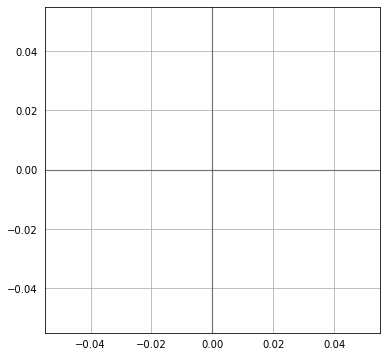

In [13]:
ax = pca.plot_row_coordinates(
    X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    labels=None,
    color_labels=y,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [27]:
finalDf = pd.concat([principalDf, df[['id']]], axis = 1)

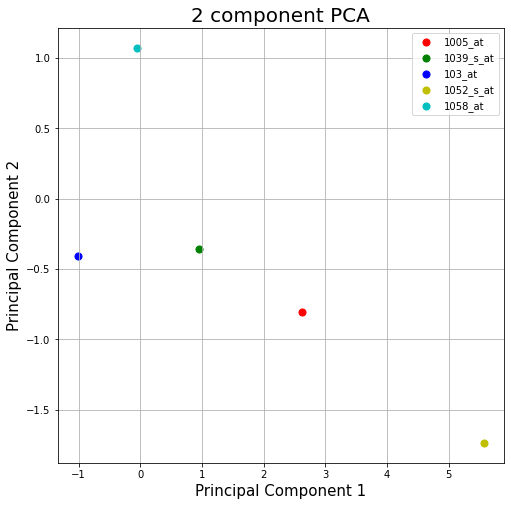

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df['id']
colors = ['r', 'g', 'b', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [30]:
pca.explained_variance_ratio_

array([0.48614581, 0.13741803])